#### Table of Contents
    1. Notebook SetUp
    2. Data Preprocessing
    3. The Elbow Technique
    4. k-Means Clustering
    5. Visualizations
    6. Descriptive Analysis
    7. Covid

# 1. Notebook SetUp

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# File Pathway

path = r'/Volumes/RAID Volume/Data Analytics/6 Advanced Analytics & Dashboard Design/11-2022 World Happiness Report'

In [4]:
# Import Dataset

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'happy_clean3.pkl'))
df_covid = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'happy_clean3.pkl'))

In [5]:
df.shape

(1157, 16)

In [6]:
df.columns

Index(['Country', 'Region', 'Year', 'Happiness Rank', 'Happiness Score',
       'Economy GDP per Capita', 'Family Social Support',
       'Health Life Expectancy', 'Freedom to Make Choices',
       'Perceptions of Corruption', 'Generosity', 'Population 2020',
       'Population 2019', 'Covid_Deaths', 'Happiness Category',
       'Covid Status'],
      dtype='object')

In [7]:
df.head()

,Country,Region,Year,Happiness Rank,Happiness Score,Economy GDP per Capita,Family Social Support,Health Life Expectancy,Freedom to Make Choices,Perceptions of Corruption,Generosity,Population 2020,Population 2019,Covid_Deaths,Happiness Category,Covid Status
0,Afghanistan,South Asia,2015,153,3.575,0.320,0.303,0.303,0.234,0.097,0.365,38928341,38041754,5.628,Low,Pre
1,Afghanistan,South Asia,2016,154,3.360,0.382,0.110,0.173,0.164,0.071,0.313,38928341,38041754,5.628,Low,Pre
2,Afghanistan,South Asia,2017,141,3.794,0.401,0.582,0.181,0.106,0.061,0.312,38928341,38041754,5.628,Low,Pre
3,Afghanistan,South Asia,2018,145,3.632,0.332,0.537,0.255,0.085,0.036,0.191,38928341,38041754,5.628,Low,Pre
4,Afghanistan,South Asia,2019,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,38928341,38041754,5.628,Low,Pre


# 2. Data Preprocessing

In [8]:
# Preparing for KMeans analysis - removing categorical columns & standardize data

df = df.drop(columns =['Country','Region','Year','Happiness Rank','Population 2020','Population 2019','Covid_Deaths','Happiness Category','Covid Status'])
df_covid = df_covid.drop(columns =['Country','Region','Year','Happiness Rank','Population 2020','Population 2019','Happiness Category'])

# 3. The Elbow Technique

In [9]:
# Starting by defining the range of the cluster

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
# Create a score for each of the ranges created

score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-1882.063723054451,
 -735.9419778659732,
 -482.84405619682445,
 -368.4114198956273,
 -309.3693141145143,
 -284.2033609480794,
 -263.8989051506048,
 -245.93619203982726,
 -234.03692684410808]

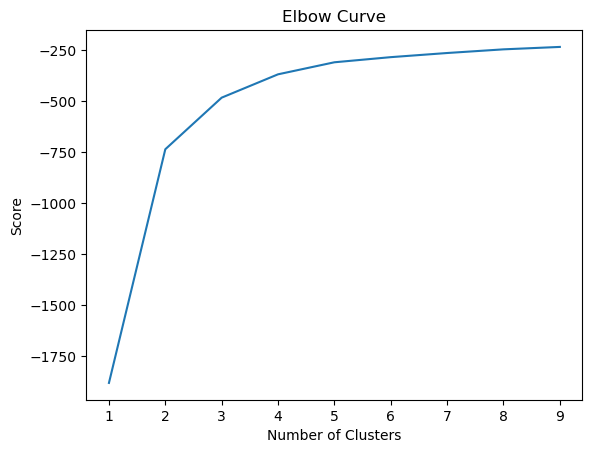

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a noticable straighter line on the x-axis after 5. Therefore, the optimal count for your clusters is 5

# 4. k-Means Clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5)

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [14]:
# Attach to the dataframe

df['clusters'] = kmeans.fit_predict(df)

In [15]:
df.head()

,Happiness Score,Economy GDP per Capita,Family Social Support,Health Life Expectancy,Freedom to Make Choices,Perceptions of Corruption,Generosity,clusters
0,3.575,0.320,0.303,0.303,0.234,0.097,0.365,1
1,3.360,0.382,0.110,0.173,0.164,0.071,0.313,1
2,3.794,0.401,0.582,0.181,0.106,0.061,0.312,1
3,3.632,0.332,0.537,0.255,0.085,0.036,0.191,1
4,3.203,0.350,0.517,0.361,0.000,0.025,0.158,1


In [16]:
df['clusters'].value_counts()

4    293
3    286
0    263
2    176
1    139
Name: clusters, dtype: int64

# 5. Visualizations

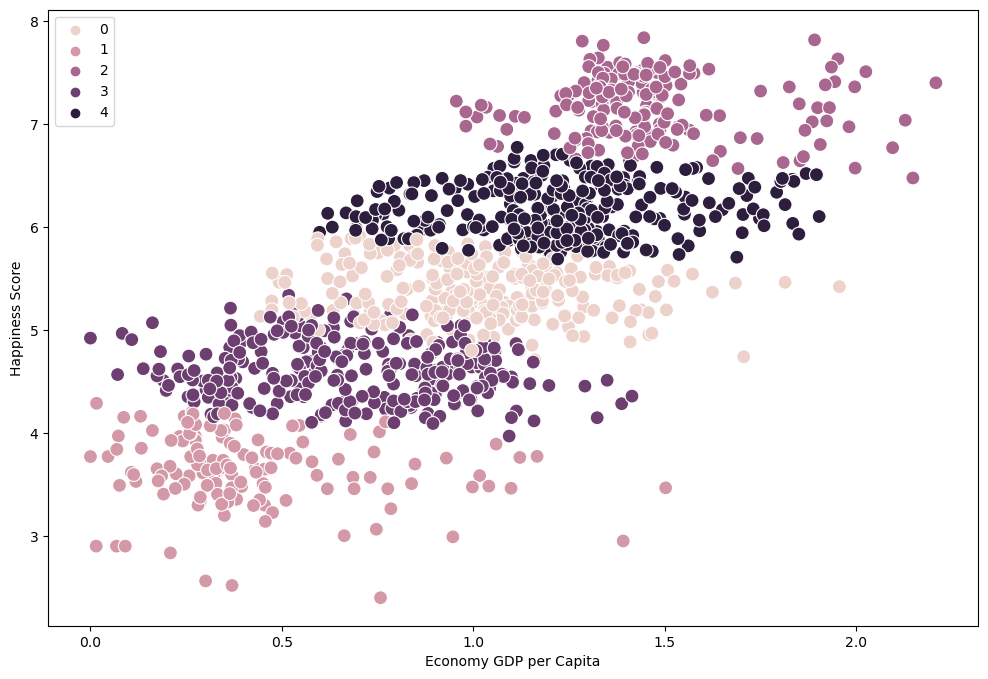

In [17]:
# Plot the clusters for the "Economy" and "Happiness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Economy GDP per Capita'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Economy GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

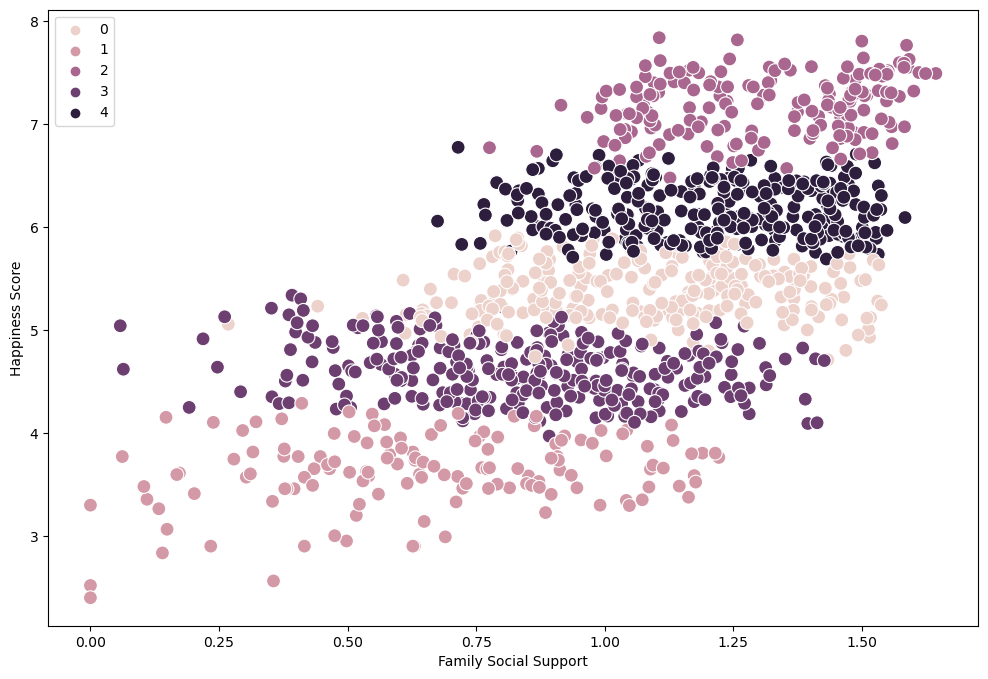

In [18]:
# Plot the clusters for the "Family" and "Happiness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Family Social Support'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Family Social Support')
plt.ylabel('Happiness Score')
plt.show()

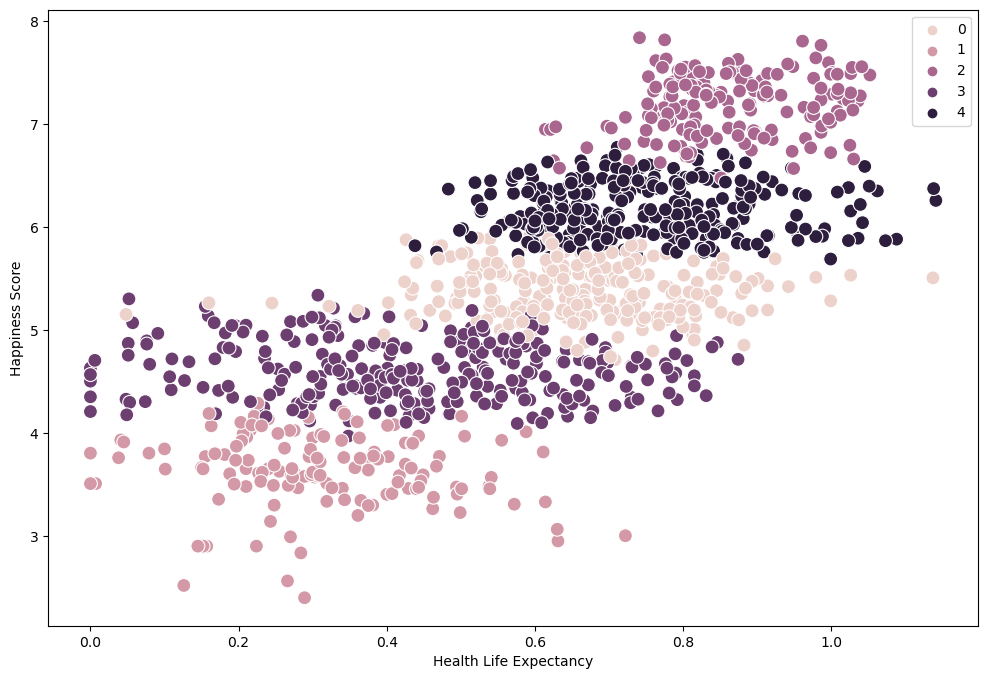

In [19]:
# Plot the clusters for the "Health" and "Happiness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Health Life Expectancy'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Health Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

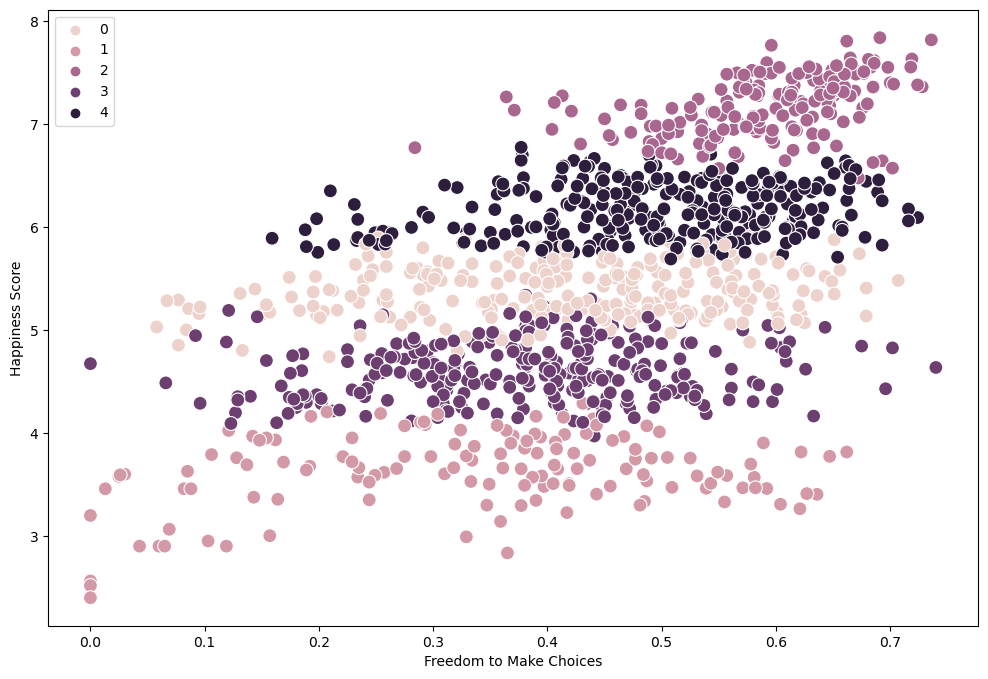

In [20]:
# Plot the clusters for the "Freedom" and "Happiness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Freedom to Make Choices'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Freedom to Make Choices')
plt.ylabel('Happiness Score')
plt.show()

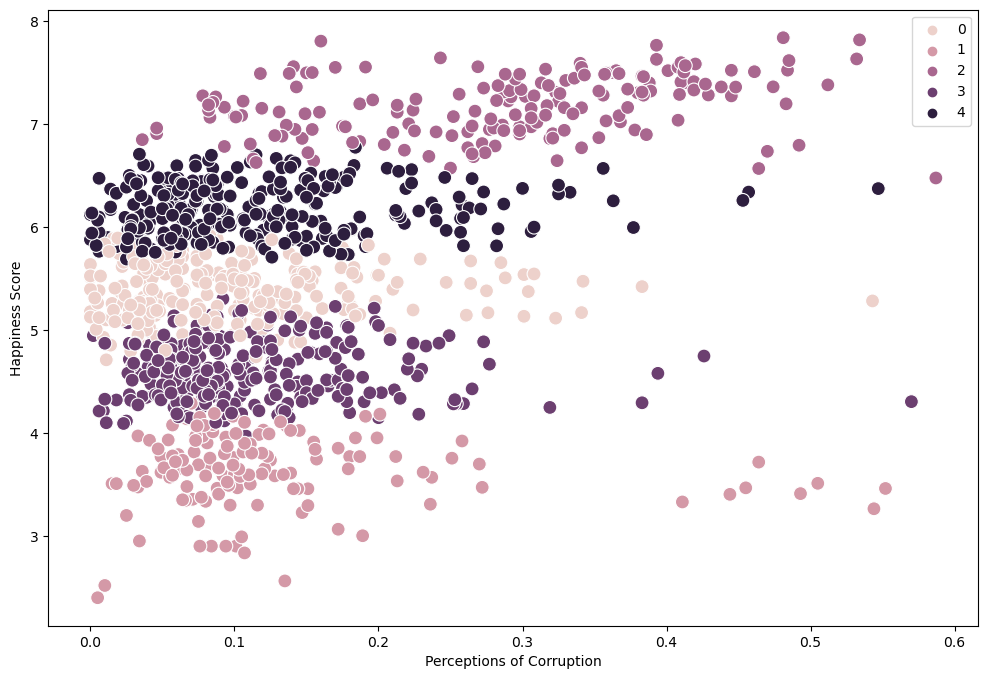

In [21]:
# Plot the clusters for the "Corruption" and "Happiness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Perceptions of Corruption'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Happiness Score')
plt.show()

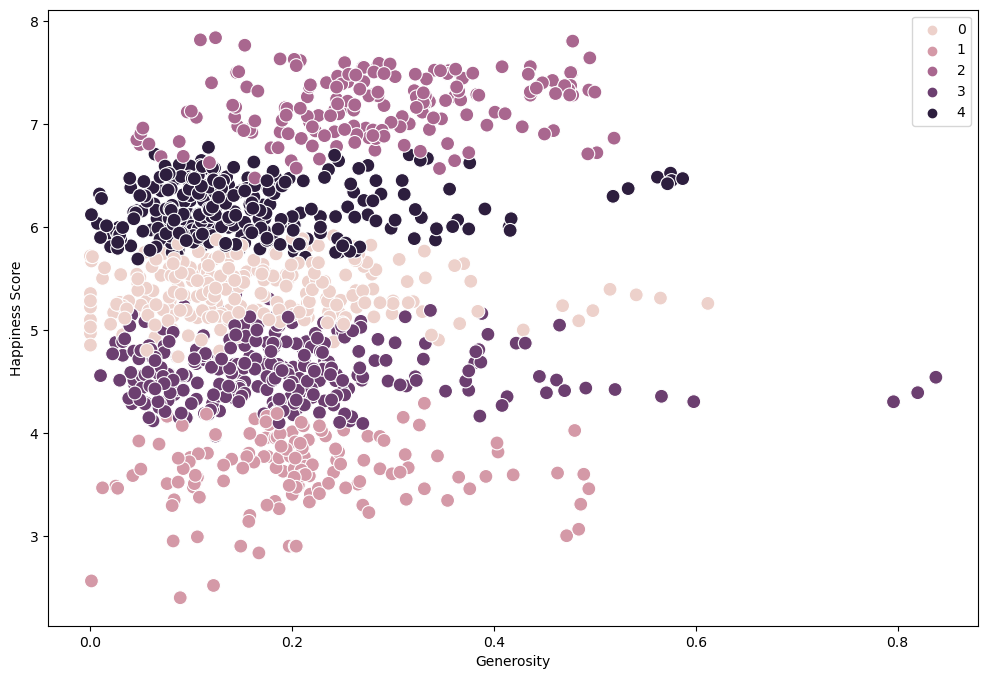

In [22]:
# Plot the clusters for the "Generosity" and "Happiness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Generosity'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

### Visualization Analysis
Overall each cluster made sense and followed an expected pattern. We can clearly see the happiess groups following a liner progression, while the horizonal spread would indicate again that total happiess is not determined by any single variable.

**Plots of Interest**
- Corruption: One would expect this to be similar to the other plots but with a negative slope. However all groups, except the most happy, all share a low perception of corruption.
- Generosity: Similarly, all groups have a low generosity perception of themselves.

# 6. Descriptive Analysis

In [23]:
df.loc[df['clusters'] == 4, 'cluster'] = 'black'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
df.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'Economy GDP per Capita':['mean', 'median'], 
                         'Family Social Support':['mean', 'median'],
                          'Health Life Expectancy':['mean', 'median'],
                            'Freedom to Make Choices':['mean', 'median'],
                            'Perceptions of Corruption':['mean', 'median'],
                            'Generosity':['mean', 'median']})

Happiness Score        Economy GDP per Capita          \
                       mean median                   mean  median   
cluster                                                             
black              6.167932  6.130               1.228348  1.2300   
dark pink          3.636417  3.657               0.420583  0.3500   
dark purple        4.606839  4.585               0.687147  0.6790   
pink               5.375814  5.358               1.018445  1.0160   
purple             7.180909  7.195               1.462301  1.4245   

            Family Social Support         Health Life Expectancy          \
                             mean  median                   mean  median   
cluster                                                                    
black                    1.206532  1.2230               0.745928  0.7330   
dark pink                0.656201  0.6440               0.316237  0.3030   
dark purple              0.844476  0.8665               0.436906  0.4285   
pink                     1.081586  1.1110               0.660042  0.6570   
purple                   1.311824  1.3215               0.860563  0.8450   

            Freedom to Make Choices         Perceptions of Corruption         \
                               mean  median                      mean median   
cluster                                                                        
black                      0.493689  0.5040                  0.115294  0.090   
dark pink                  0.338784  0.3650                  0.127647  0.099   
dark purple                0.379920  0.3865                  0.109164  0.089   
pink                       0.416300  0.4360                  0.095738  0.077   
purple                     0.591483  0.5990                  0.287415  0.298   

            Generosity          
                  mean  median  
cluster                         
black         0.155321  0.1270  
dark pink     0.208741  0.2020  
dark purple   0.189329  0.1770  
pink          0.163418  0.1420  
purple        0.284506  0.2805

### Descriptive Analysis
Nothing of sigificant notice that we haven't already seen through the visualizations.

These task results have been useful in seeing which happiness pillars are more important than others. 

# 7. Covid

In [25]:
# Create Post-Covid data subset

df_covid = df_covid[df_covid['Covid Status'] == 'Post']

In [26]:
df_covid = df_covid.drop(columns =['Covid Status'])

In [27]:
# Starting by defining the range of the cluster

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [28]:
# Elbow Tech
# Create a score for each of the ranges created

score2 = [kmeans[i].fit(df_covid).score(df_covid) for i in range(len(kmeans))]

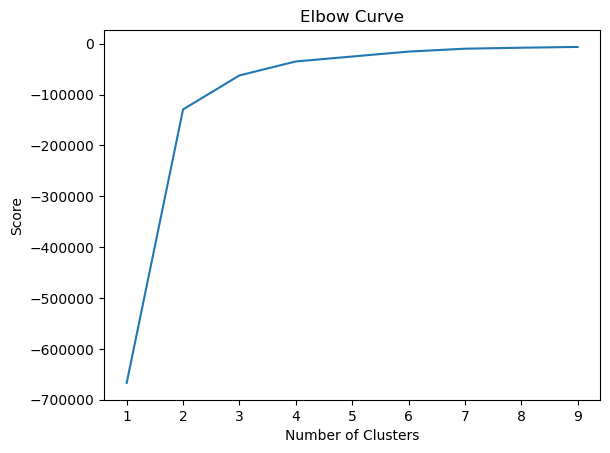

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score2)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [30]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [31]:
# Fit the k-means object to the data.

kmeans.fit(df_covid)

KMeans(n_clusters=4)

In [32]:
# Attach to the dataframe

df_covid['clusters'] = kmeans.fit_predict(df_covid)

In [33]:
df_covid['clusters'].value_counts()

2    235
0     99
1     72
3     34
Name: clusters, dtype: int64

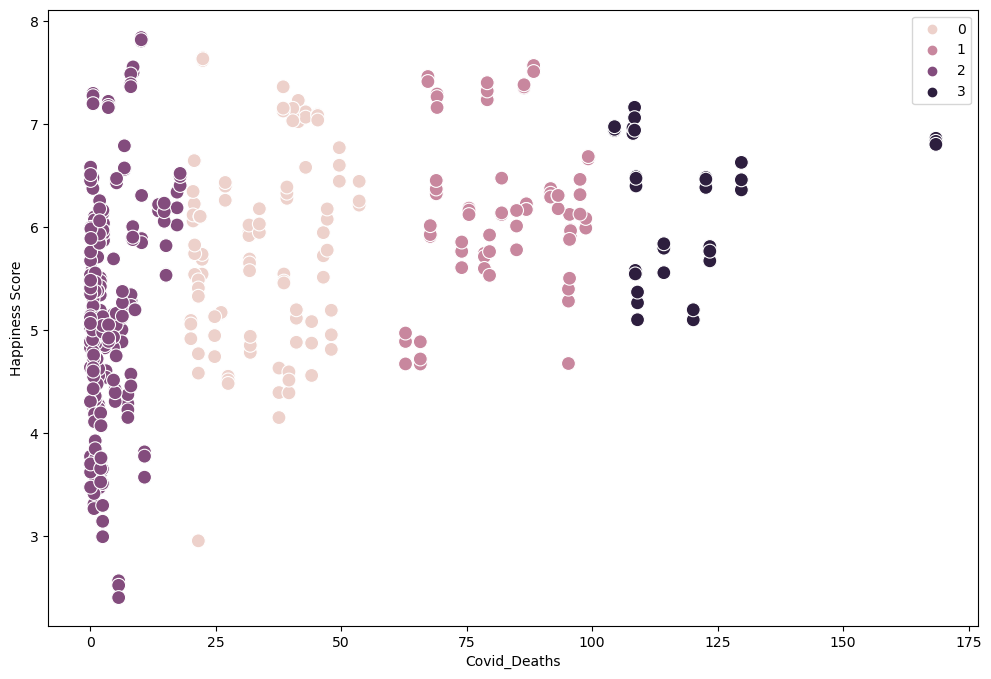

In [34]:
# Plot the clusters for the "Covid" and "Happiness" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_covid['Covid_Deaths'], y=df_covid['Happiness Score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Covid_Deaths')
plt.ylabel('Happiness Score')
plt.show()